In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import math

#Creating the static network

In [ ]:
#global variables
network = {}
edges = []

color_map = []
infected = set()

criticals = set()


In [ ]:
def makeGraph(N,Pk,Pe1,Pe2):
  global network,edges,color_map,infected,criticals
  network = {}
  edges = []
  color_map = []
  infected = set()
  criticals = set()
  #N = 10

  for v in range(N):
    network[v] = set()

  for u in range(N):
    #Pk = 0.25
    nodeType = random.choices([0,1],weights = [(1-Pk),Pk])[0]
    cnt = 0
    for v in range(u):
      #Pe1 = 0.3
      #Pe2 = 0.8
      Pe = Pe1 if nodeType==0 else Pe2
      isEdge = random.choices([0,1],weights = [(1-Pe),Pe])[0]
      if isEdge:
          cnt = cnt+1
          network[u].add(v)
          network[v].add(u)
          edges.append((u,v))
    if cnt==0 and u!=0:
      v =math.floor((u)*random.random())
      network[u].add(v)
      network[v].add(u)
      edges.append((u,v))

  G = nx.Graph()
  for v in range(N):
    G.add_node(v)

  G.add_edges_from(edges)
  return G

In [ ]:
#G is also a global variable, the graph itself.
G = makeGraph(10,0.25,0.3,0.8)
print(G)
print(G.number_of_nodes())

Graph with 10 nodes and 16 edges
10


The above code creates the static network. This is done using the following input variables:

1. **N = Total number of people (nodes)**
2. *Pk = Probability of node u being 1-node.*
Each node can be of 2 types, a 1-node (higher probability of making edges) or 0-node.
3. *Pe1 = Probability of an edge (u,v) being created, when u is 0-Type node.*
4. *Pe2 = Probability of an edge (u,v) being created, when u is 1-Type node.*


#Visualizing (& Reseting to all blue) the Graph

In [ ]:
def resetGraph(G):
  global color_map,infected
  color_map = ['blue']*(G.number_of_nodes())
  infected = set()

def drawGraph(G):
  nx.draw(G,with_labels=True,node_color = color_map)
  plt.show()

In [ ]:
resetGraph(G)
#drawGraph(G)

#print(edges)
print(network)

{0: {1, 2, 3, 6, 8}, 1: {0, 2, 3}, 2: {0, 1, 3, 4, 5, 6}, 3: {0, 1, 2, 5}, 4: {2}, 5: {8, 2, 3, 7}, 6: {0, 2}, 7: {8, 9, 5}, 8: {0, 5, 7}, 9: {7}}


# Finding Critical nodes


**Nc = number of critical nodes in the graph.**

For starters, we consider another input variable, *k = Number of minimum edges for a node to be critical.*

As an initial guess, we take k= (N//2) + 1

Below we calculate Nc, as well as Criticals, i.e. a list of critical nodes in the network.

In [ ]:
def countCritical(G,k):
  #global criticals
  N = G.number_of_nodes()
  Nc = 0
  for v in range(N):
    if len(network[v])>=k:
      Nc+=1
      criticals.add(v)
  return Nc

In [ ]:
Nc = countCritical(G,G.number_of_nodes()//10)
print(Nc, criticals)

10 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Infecting first node

##Visualising The Infected as Orange

In [ ]:
def startInfection(G):
  patient0 = random.randint(0, G.number_of_nodes() - 1)
  print(patient0)
  color_map[patient0] = 'orange'
  infected.add(patient0)


0


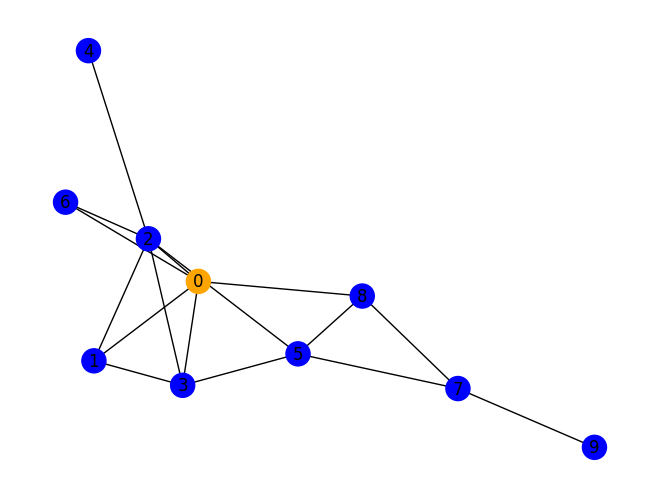

In [ ]:
startInfection(G)
drawGraph(G)

# The Simulation

## Evolution function for one unit of time

In [ ]:
def timestep(mu, r):

  newlyInfected = set()
  justRecovered = set()

  for u in infected:
    #time moves for each node u
    #print(u)
    #spreads ahead?
    for v in network[u]:
      if v in infected or v in newlyInfected:
        continue

      infectsV = random.choices([0,1],weights = [1-r,r])[0]
      #print(infectsV)
      if infectsV==1:
        newlyInfected.add(v)

    #recovers?
    recovers = random.choices([0,1],weights = [1-mu,mu])[0]
    if recovers==1:
      justRecovered.add(u)

  for u in newlyInfected:
    color_map[u]='orange'
    infected.add(u)
  for u in justRecovered:
    color_map[u]='blue'
    infected.remove(u)



The two parameters used in the above timestep are :


1.   mu = Probability that an infected person recovers in one unit time
2.   r = Probability that an infected person spreads the disease to it's susceptible neighbour(s) in one unit time




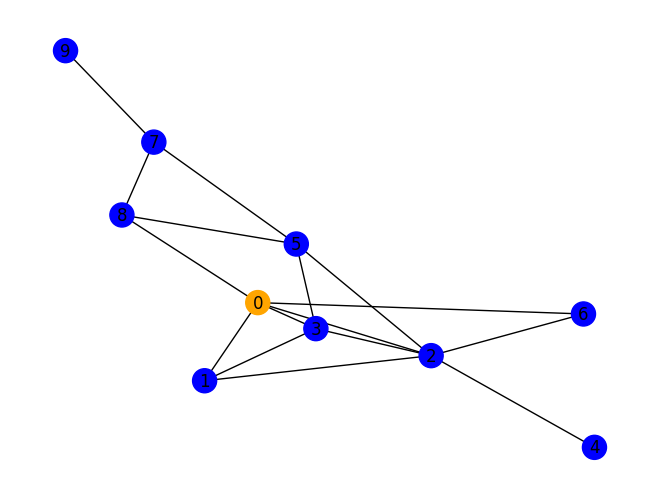

{0}


In [ ]:
drawGraph(G)
print(infected)

## Running time

In [ ]:
def runSim(G,steps, mu, r):
  resetGraph(G)
  startInfection(G)
  N = G.number_of_nodes()
  infectedData = [0,len(infected)/N]
  for t in range(steps):
    timestep(mu,r)
    infectedData.append(len(infected)/N)
    #drawGraph(G)
    #print(infected)
  return infectedData

# Verifying algorithm for normal SIS

###Graph parameter selection :
1. N = 10000, a big enough number that runs in a sensible amount of time.
2. Pk = 0 -> Considering an unbiased random network as of now.
3. Pe1 = Pe2 = 0.?? (need help.)

In [ ]:
G = makeGraph(10000,0.025,0.0001,0.1)
print(G)

Graph with 10000 nodes and 133046 edges


In [ ]:
print(G)
Nc = countCritical(G,G.number_of_nodes()//10)
print(Nc)

Graph with 10000 nodes and 133046 edges
0


In [ ]:
infectedData = runSim(G,3000,0.2,0.05)
print(infectedData[:100])

7523
[0, 0.0001, 0.0001, 0.0002, 0.0002, 0.0003, 0.0054, 0.0206, 0.1161, 0.3491, 0.5099, 0.5633, 0.5918, 0.6062, 0.6112, 0.6188, 0.6245, 0.6229, 0.6191, 0.6176, 0.6245, 0.6371, 0.6268, 0.6314, 0.6304, 0.6292, 0.6245, 0.6363, 0.6369, 0.633, 0.641, 0.633, 0.6368, 0.6372, 0.636, 0.6361, 0.616, 0.6216, 0.6352, 0.6338, 0.6341, 0.6298, 0.632, 0.6316, 0.6422, 0.6399, 0.6378, 0.6386, 0.631, 0.6297, 0.6237, 0.6308, 0.6366, 0.6273, 0.6326, 0.629, 0.6282, 0.634, 0.6396, 0.6381, 0.6331, 0.631, 0.6283, 0.6235, 0.6236, 0.6287, 0.6304, 0.6226, 0.6292, 0.6325, 0.6318, 0.633, 0.6309, 0.6332, 0.6278, 0.6369, 0.6329, 0.6319, 0.6316, 0.6243, 0.6274, 0.6288, 0.6297, 0.6299, 0.6286, 0.6251, 0.6282, 0.6315, 0.6333, 0.6302, 0.6314, 0.6368, 0.6338, 0.6331, 0.6351, 0.6315, 0.6258, 0.6233, 0.6269, 0.6287]


In [ ]:
suscepData = [1 - infectedData[i] for i in range(len(infectedData))]

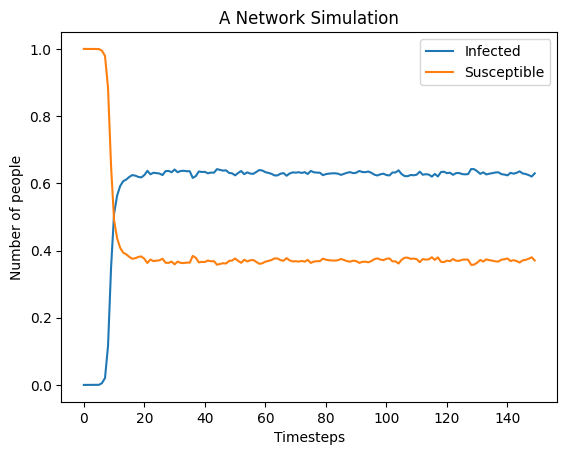

In [ ]:
plt.plot(infectedData[:150], label = 'Infected')
plt.plot(suscepData[:150], label = 'Susceptible')
plt.title("A Network Simulation")
plt.xlabel("Timesteps")
plt.ylabel("Number of people")
plt.legend()

# Few good results

In [ ]:
print("Are you sure you want to run these cells?")
ans = str(input())

In [ ]:
#DO NOT RUN THIS CELL.
#plt.plot(infectedData[:500])

In [ ]:
#DO NOT RUN THIS CELL
#plt.plot(infectedData[:400])

In [ ]:
#DO NOT RUN THIS CELL
#plt.plot(infectedData[:100])

In [ ]:
#DO NOT RUN THIS CELL
#plt.plot(infectedData[:100])

## biased to make criticals

In [ ]:
#DO NOT RUN THIS CELL

#Graph with 10000 nodes and 226018 edges
#73
#infectedData = runSim(G,3000,0.2,0.05)
#plt.plot(infectedData[:100])

In [ ]:
#DO NOT RUN THIS CELL
#Graph with 10000 nodes and 128772 edges
#3
#
#infectedData = runSim(G,3000,0.2,0.05)
plt.plot(infectedData[:200])